In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

random.seed(42)

In [2]:
df = pd.read_csv('Steel_industry_data.csv')

df.sample(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
8035,25/03/2018 17:00,23.08,0.25,11.20,0.01,99.99,89.97,61200,Weekend,Sunday,Maximum_Load
19483,22/07/2018 23:00,2.95,0.00,4.14,0.00,100.00,58.03,82800,Weekend,Sunday,Light_Load
33174,12/12/2018 13:45,77.00,35.10,0.00,0.04,90.99,100.00,49500,Weekday,Wednesday,Medium_Load
20581,03/08/2018 09:30,3.53,0.00,16.99,0.00,100.00,20.34,34200,Weekday,Friday,Light_Load
23799,05/09/2018 22:00,3.85,0.04,15.98,0.00,99.99,23.42,79200,Weekday,Wednesday,Medium_Load
21928,17/08/2018 10:15,46.08,24.16,0.00,0.02,88.57,100.00,36900,Weekday,Friday,Maximum_Load
34797,29/12/2018 11:30,9.36,0.00,13.68,0.00,100.00,56.47,41400,Weekend,Saturday,Light_Load
26562,04/10/2018 16:45,75.20,51.84,0.00,0.03,82.33,100.00,60300,Weekday,Thursday,Maximum_Load
29721,06/11/2018 14:30,50.90,26.39,0.00,0.02,88.78,100.00,52200,Weekday,Tuesday,Medium_Load
24254,10/09/2018 15:45,87.70,41.44,0.00,0.04,90.41,100.00,56700,Weekday,Monday,Maximum_Load


In [3]:
# Date Continuous-time data taken on the first of the month
# Usage_kWh Industry Energy Consumption Continuous kWh (target)
# Lagging Current reactive power Continuous kVarh
# Leading Current reactive power Continuous kVarh
# CO2 Continuous ppm
# NSM Number of Seconds from midnight Continuous S (current tinme)
# Week status Categorical (Weekend (0) or a Weekday(1))
# Day of week Categorical Sunday, Monday : Saturday
# Load Type Categorical Light Load, Medium Load, Maximum Load

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower() #Переименовываем колонки для более удобной работы

In [5]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2.880000,0.000000,0.000000,0.000000,49.990000,21.780000,8100.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
90%,78.084000,39.020000,17.170000,0.040000,100.000000,100.000000,77400.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   usage_kwh                             35040 non-null  float64
 2   lagging_current_reactive.power_kvarh  35040 non-null  float64
 3   leading_current_reactive_power_kvarh  35040 non-null  float64
 4   co2(tco2)                             35040 non-null  float64
 5   lagging_current_power_factor          35040 non-null  float64
 6   leading_current_power_factor          35040 non-null  float64
 7   nsm                                   35040 non-null  int64  
 8   weekstatus                            35040 non-null  object 
 9   day_of_week                           35040 non-null  object 
 10  load_type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
df.isna().sum()
#Нет пропусков

date                                    0
usage_kwh                               0
lagging_current_reactive.power_kvarh    0
leading_current_reactive_power_kvarh    0
co2(tco2)                               0
lagging_current_power_factor            0
leading_current_power_factor            0
nsm                                     0
weekstatus                              0
day_of_week                             0
load_type                               0
dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df.set_index('date', inplace=True)

In [9]:
#NSM несет избыточную информацию, так как у нас уже есть время измерения, удалим его

df = df.drop(columns=['nsm'])


In [10]:
y = df['usage_kwh']
x = df.drop(columns = ['usage_kwh'])

In [11]:
x

,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,weekstatus,day_of_week,load_type
date,,,,,,,,
2018-01-01 00:15:00,2.95,0.00,0.0,73.21,100.00,Weekday,Monday,Light_Load
2018-01-01 00:30:00,4.46,0.00,0.0,66.77,100.00,Weekday,Monday,Light_Load
2018-01-01 00:45:00,3.28,0.00,0.0,70.28,100.00,Weekday,Monday,Light_Load
2018-01-01 01:00:00,3.56,0.00,0.0,68.09,100.00,Weekday,Monday,Light_Load
2018-01-01 01:15:00,4.50,0.00,0.0,64.72,100.00,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,4.86,0.00,0.0,62.10,100.00,Weekday,Monday,Light_Load
2018-12-31 23:15:00,3.74,0.00,0.0,70.71,100.00,Weekday,Monday,Light_Load
2018-12-31 23:30:00,3.17,0.07,0.0,76.62,99.98,Weekday,Monday,Light_Load


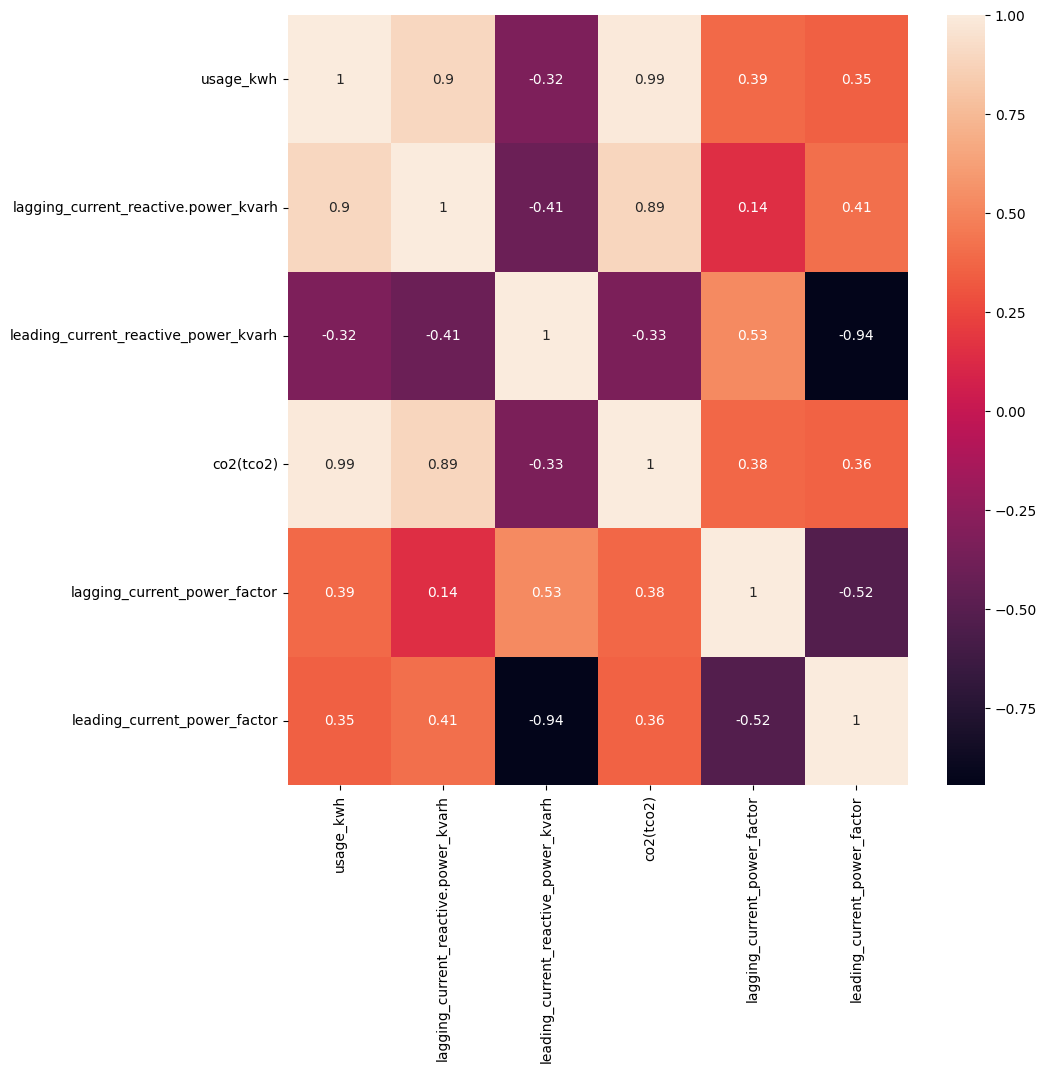

In [12]:
df_num = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(), annot = True)
plt.show()

In [13]:
#leading_current_power_factor и leading_current_reactive_power_kvarh  
#lagging_current_power_factor и lagging_current_reactive.power_kvarh  Имеют корреляцию близкую к 1
#Оставим только столбцы с power factor потому что на практике его проще измерить

df = df.drop(columns=['lagging_current_reactive.power_kvarh', 'leading_current_reactive_power_kvarh'])

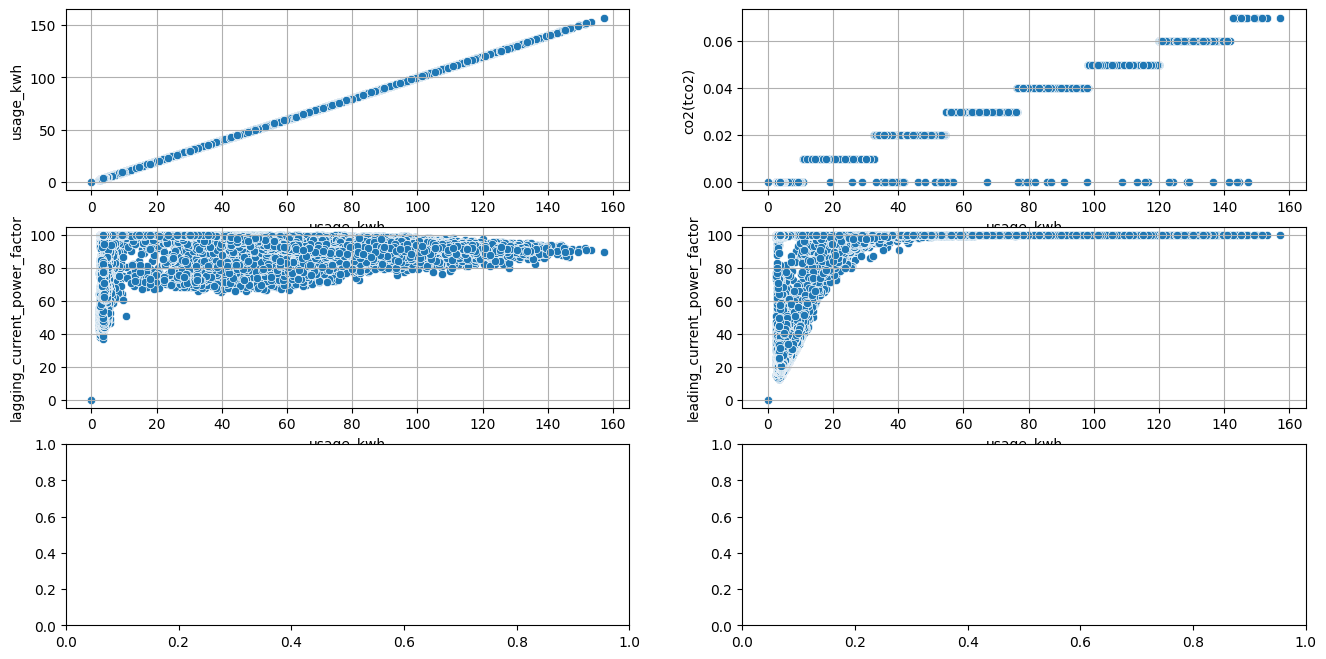

In [14]:
df_num = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(3, 2, figsize = (16, 8))


for ax, column in zip(axes.flatten(), list(df_num.columns)):

    sns.scatterplot(x=y, y=column, data=df, ax=ax)
    ax.set_xlabel('usage_kwh')
    ax.set_ylabel(column)
    ax.grid(True)

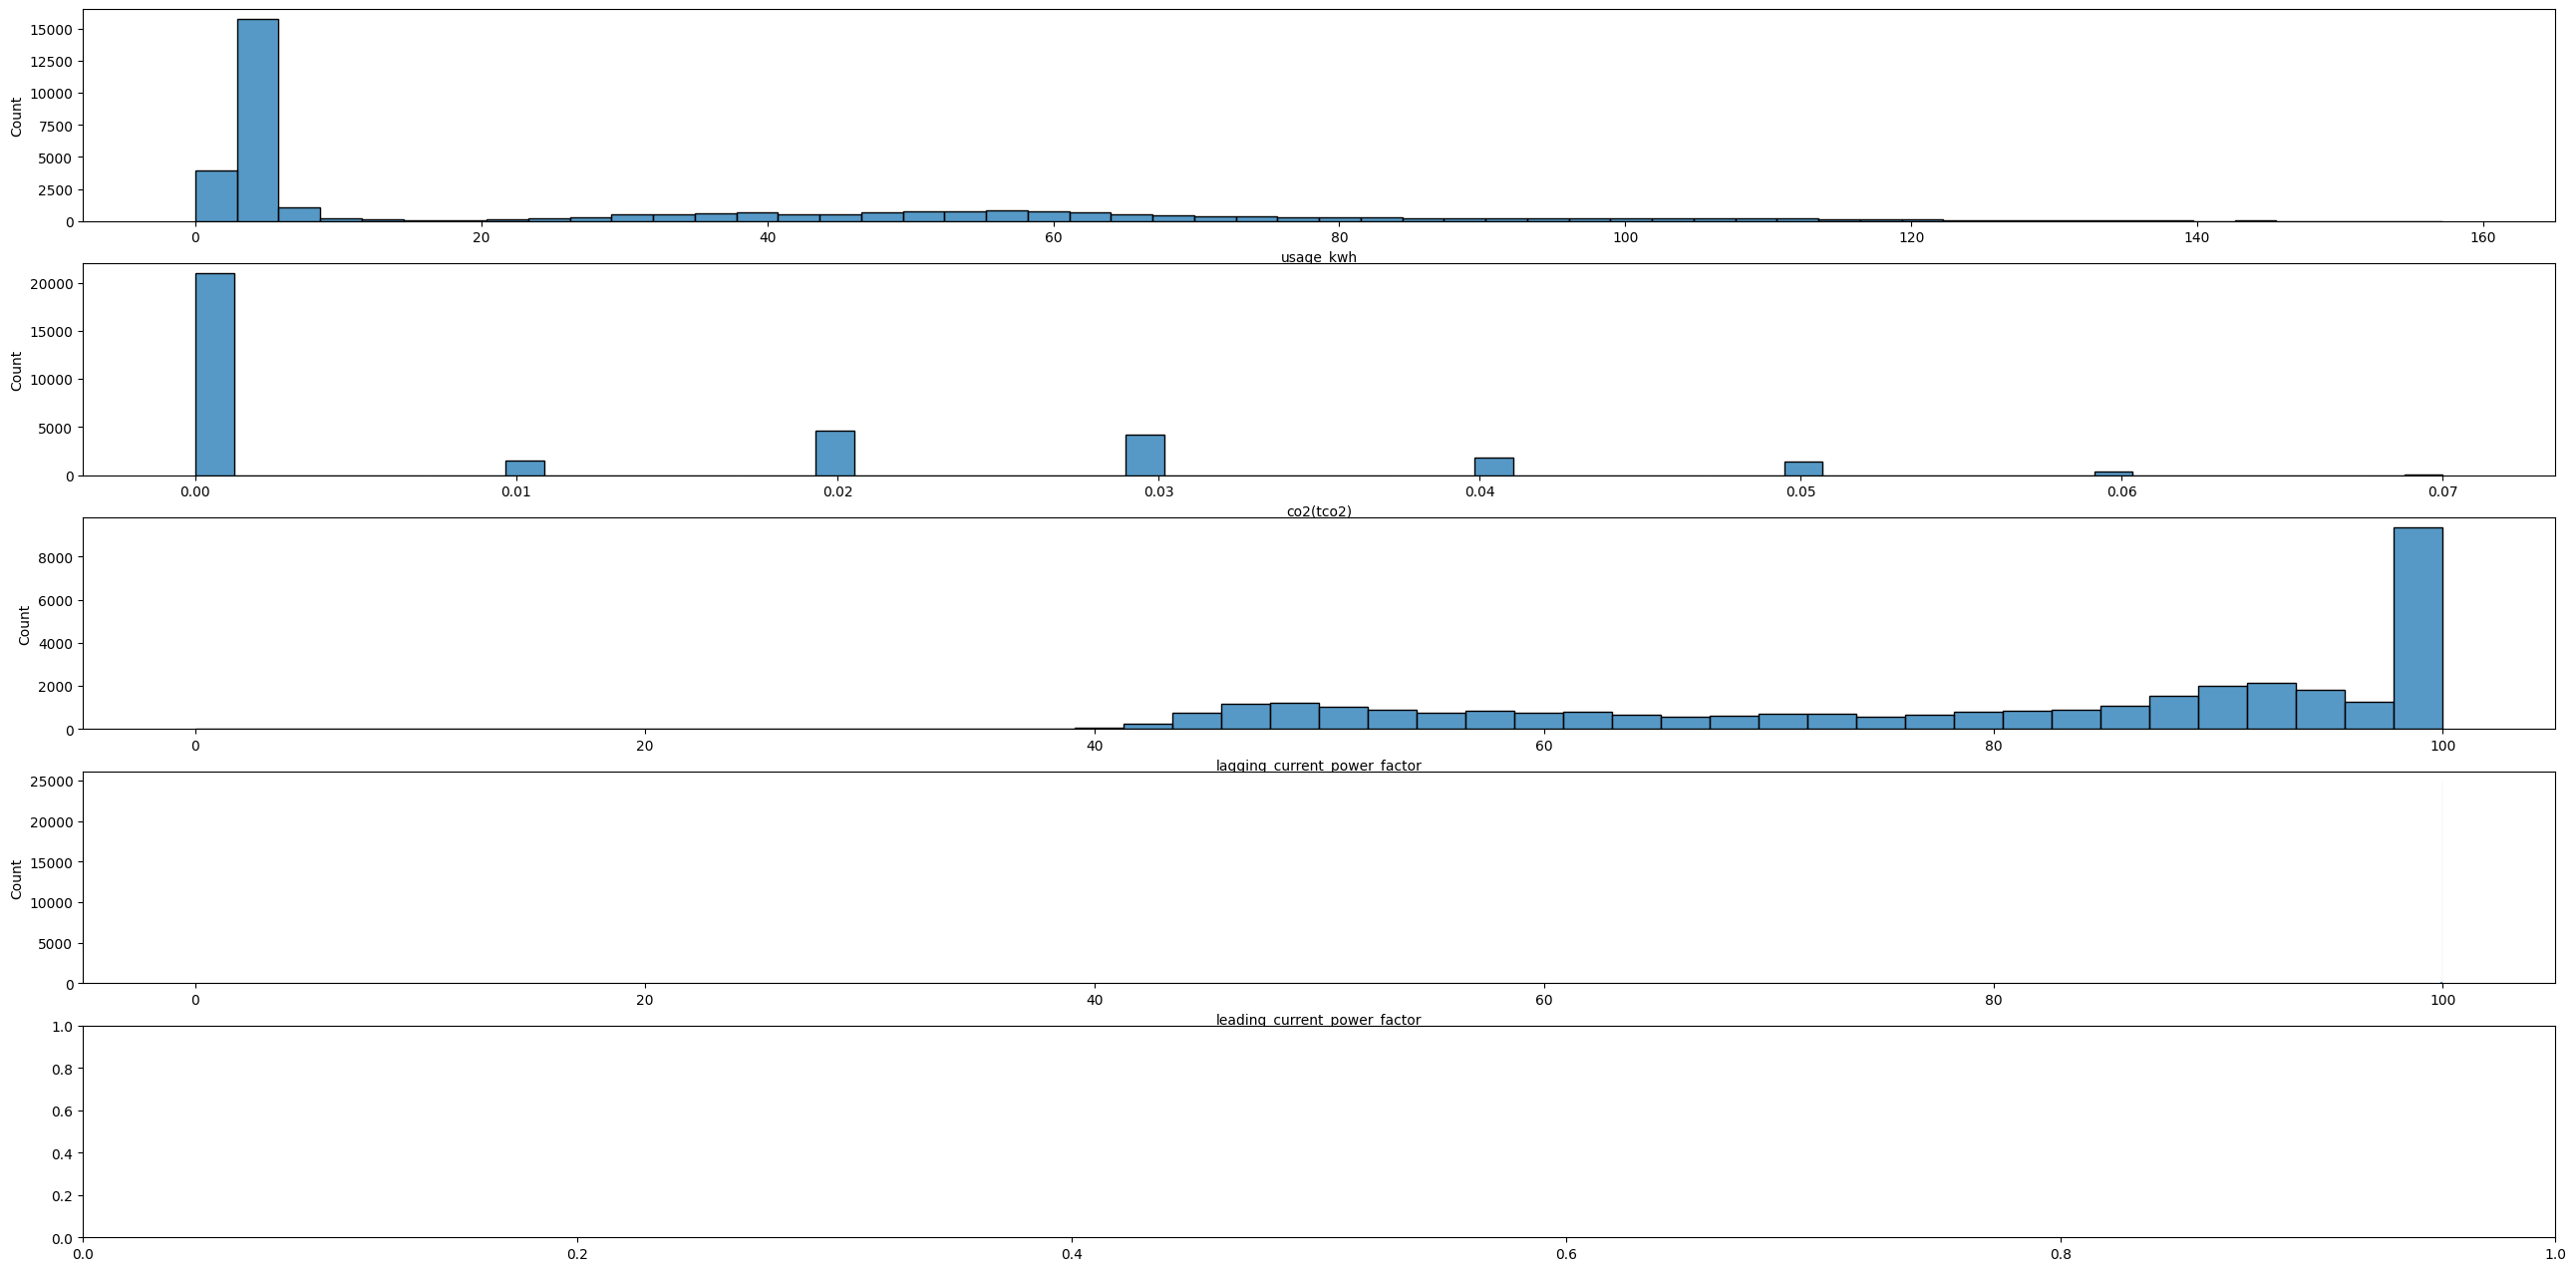

In [15]:
#Проверяем на выбросы 

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.histplot(data=df_num, x=col, ax=axes[idx % 5])

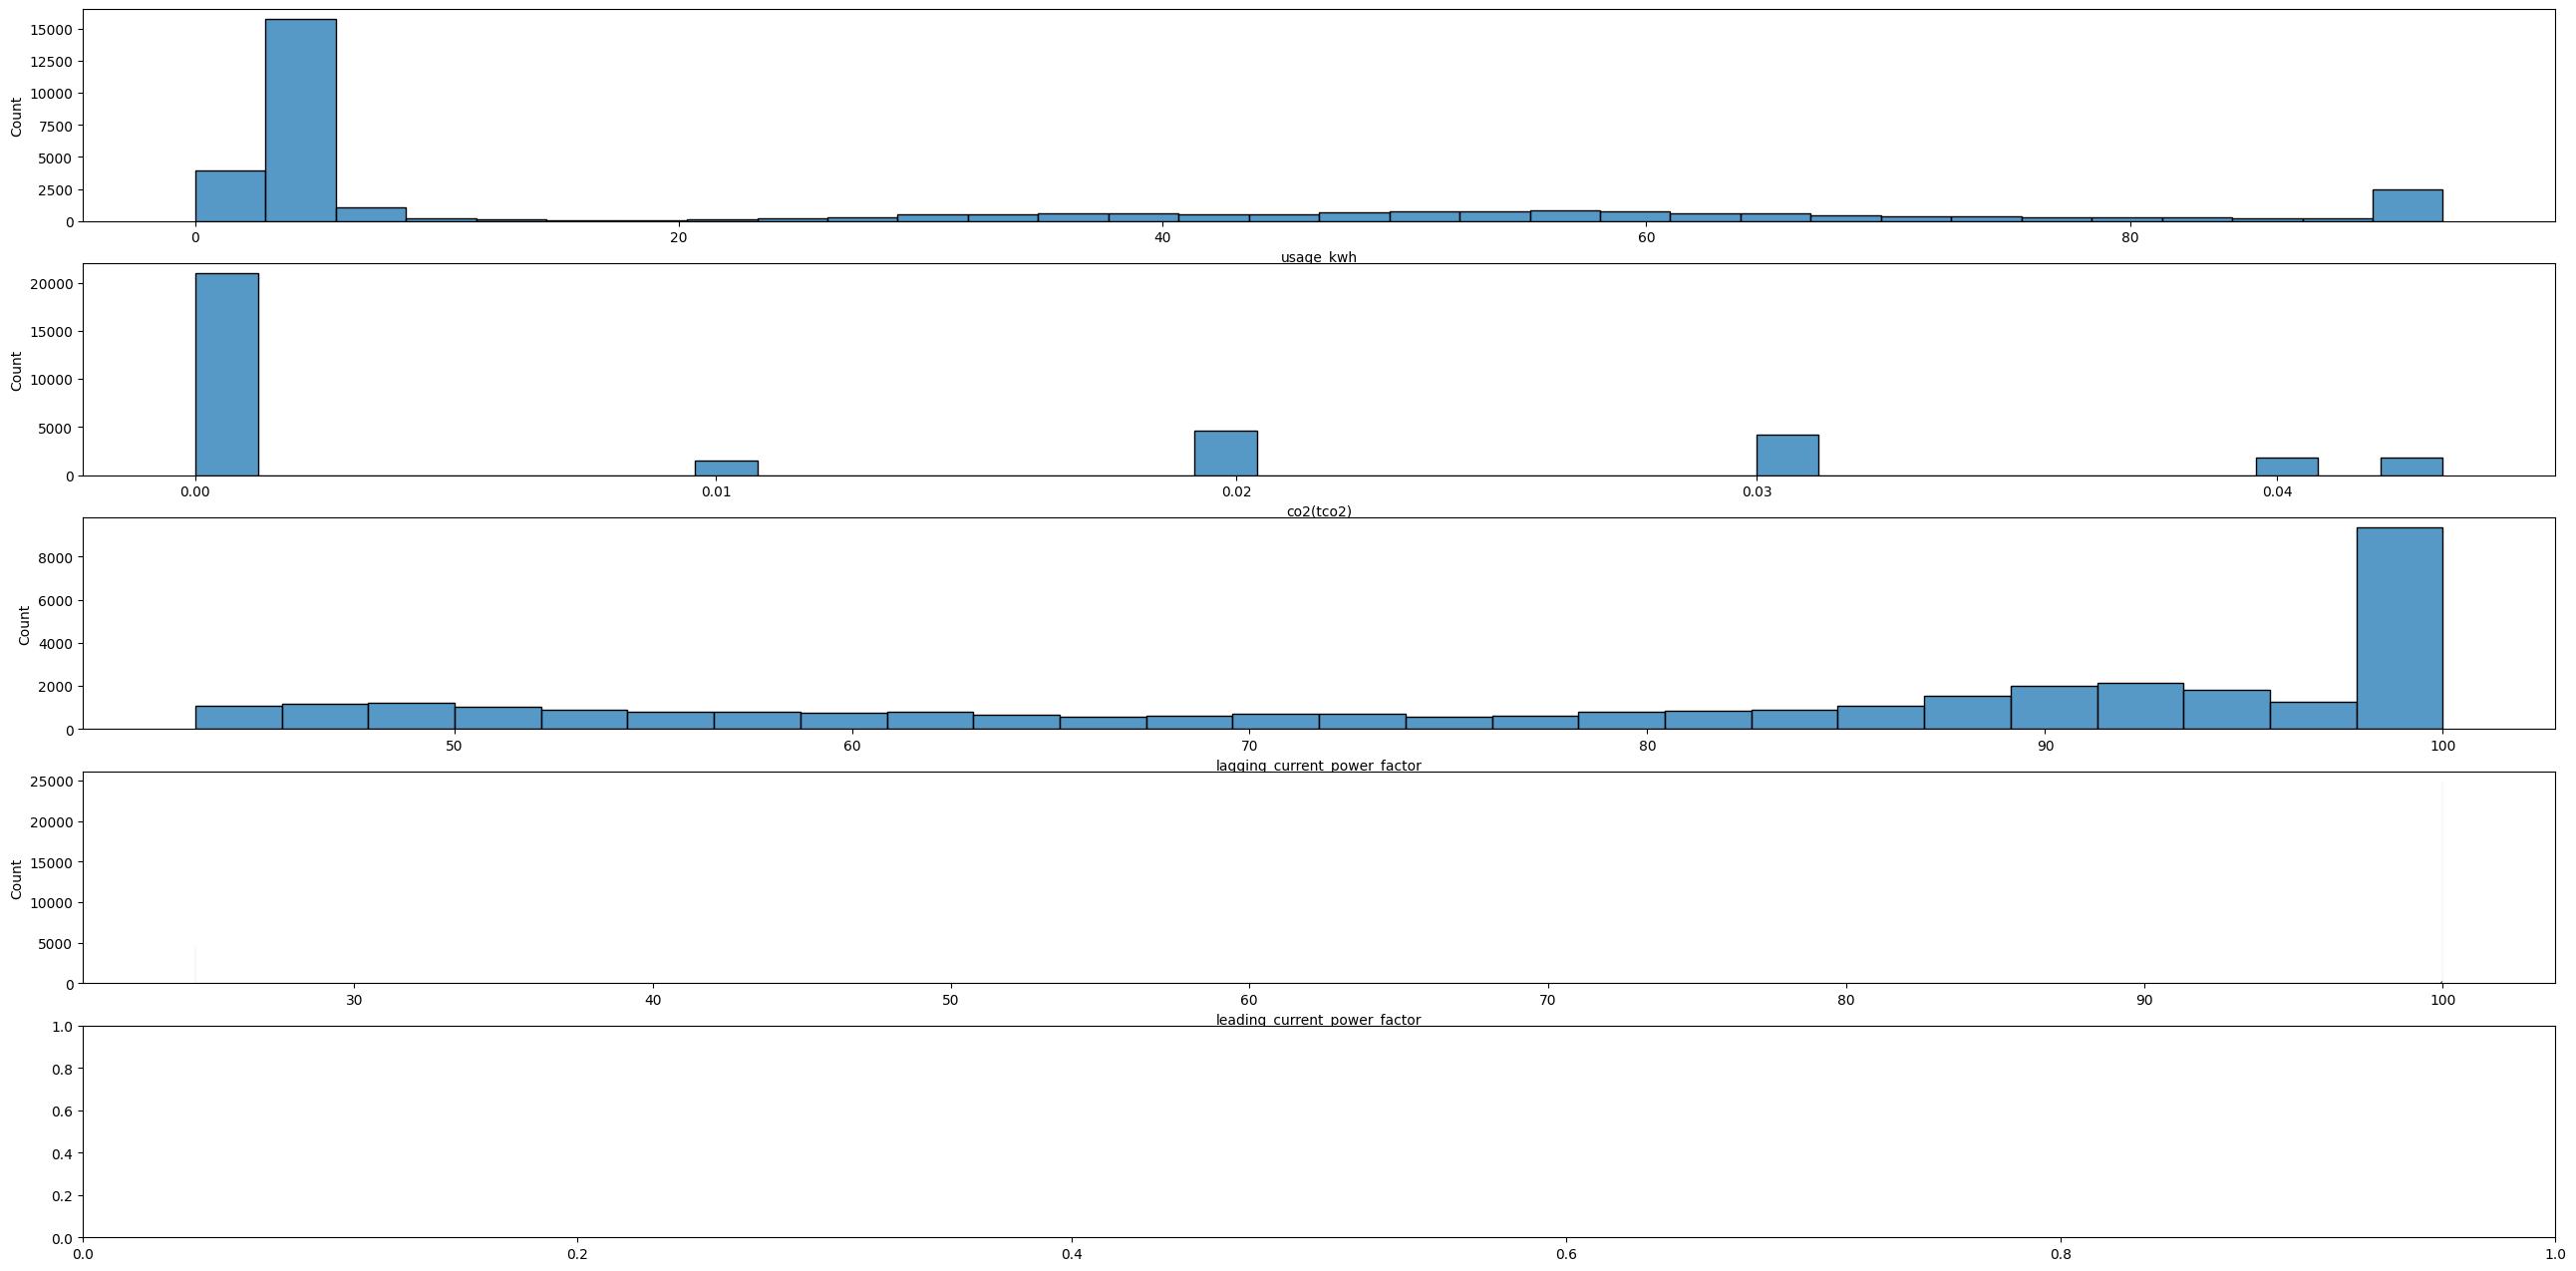

In [16]:
def replace_outliers(df: pd.DataFrame, threshold:float = 1.96):

    '''threshold = 1.96 for 95% of data 3 for 99.7%'''

    from scipy import stats

    for col in df.select_dtypes(include=['number']).columns.tolist():
        z_scores = stats.zscore(df_num[col], nan_policy='omit')

        # Вычисляем границы интервала
        upper_bound = df[col].mean() + threshold * df[col].std()
        lower_bound = df[col].mean() - threshold * df[col].std()

        # Замена выбросов на границы интервала
        df.loc[z_scores > threshold, col] = upper_bound
        df.loc[z_scores < -threshold, col] = lower_bound


    return df.copy()

df = replace_outliers(df, 1.96)

df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.histplot(data=df_num, x=col, ax=axes[idx % 5])

In [17]:
#Обработка категориальных значений
df.weekstatus.value_counts()    #обработаем через OHE


weekstatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64

In [18]:
print(df.load_type.value_counts())  

# load_type - категориальная переменная которая имеет порядок обработаем через OrdianlEncoder

load_type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


In [19]:
print(df.day_of_week.value_counts())
#day_of_week - день недели, в нашем случае нет необходимости делать циклический энкодинг, сделаем через OHE

day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64


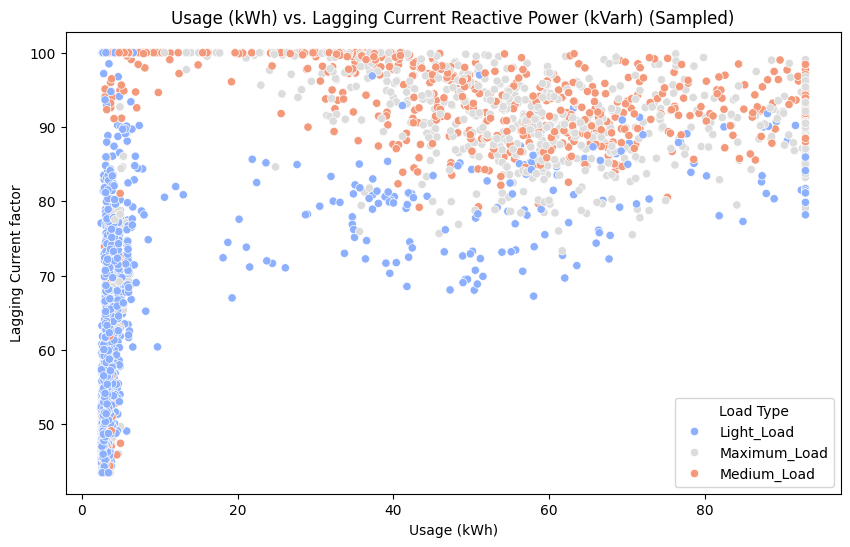

In [20]:
df_sample = df.sample(frac=0.1, random_state=42)  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='usage_kwh', y='lagging_current_power_factor', hue='load_type', palette='coolwarm')
plt.title('Usage (kWh) vs. Lagging Current Reactive Power (kVarh) (Sampled)')
plt.xlabel('Usage (kWh)')
plt.ylabel('Lagging Current factor')
plt.legend(title='Load Type')
plt.show()

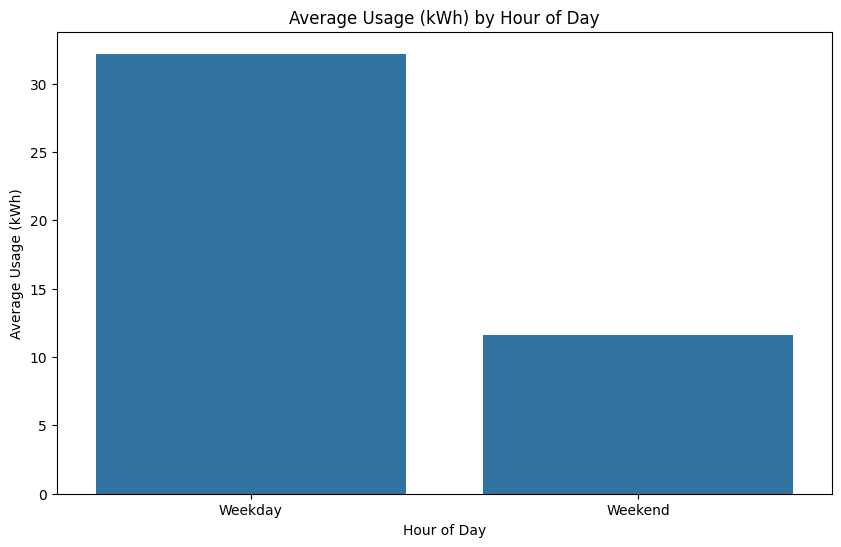

In [21]:
hourly_usage = df.groupby('weekstatus')['usage_kwh'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Average Usage (kWh) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.show()

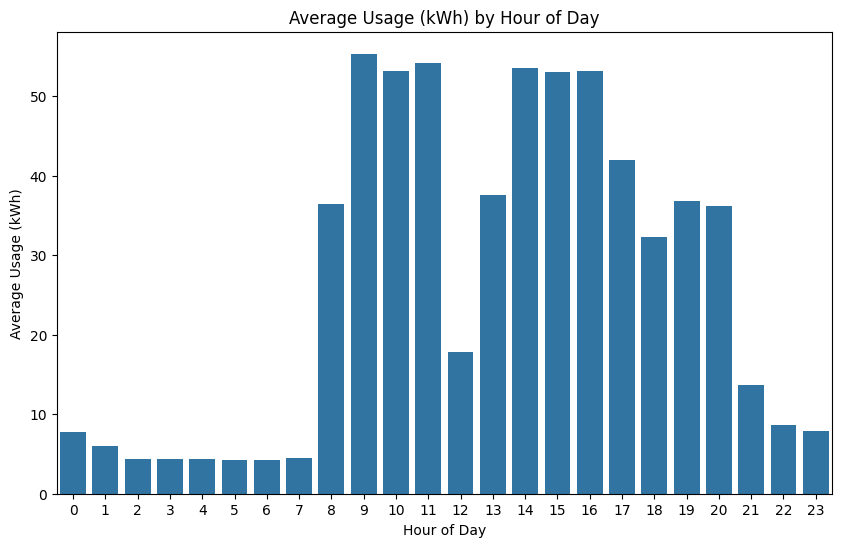

In [22]:
#Строим график зависимости мощности по часам
df['hour'] = df.index.hour
hourly_usage = df.groupby('hour')['usage_kwh'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Average Usage (kWh) by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.xticks(range(0, 24))
plt.show()

In [23]:
#выражена зависимость между часами. Ночью (22-8) минимальное потреблени
#В обед так снижение потребление
#пик нагрузки в рабочее время
#Вечером некоторе снижение


In [24]:
df.to_csv('steel_industry_preprocessed.csv')

In [25]:
#Строим модель
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

y = df['usage_kwh']
x = df.drop(columns=['usage_kwh'])

# Разделение данных на обучающую и тестовую выборки с сохранением распределения
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [26]:
numerical_features = x.select_dtypes(include=np.number).columns.to_list()
ohe_features = x.select_dtypes(exclude=np.number).columns.to_list()
ordinal_features = ['load_type']
for ordial_feature in ordinal_features:
    ohe_features.remove(ordial_feature)

numeric_transforms = [
    ('scaler', RobustScaler())
]

normalizer = Pipeline(steps=numeric_transforms)

onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocess_normalize = ColumnTransformer(
    transformers=[
        ('num', normalizer, numerical_features),
        ('onehot', onehot_transformer, ohe_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ])

preprocess = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, ohe_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ])

In [27]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval

from concurrent.futures import ThreadPoolExecutor, wait, ALL_COMPLETED 

#формат класс модели - гиперпараметры для поиска
models = {
    LinearRegression: {},
    Lasso: {
        'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10))  # Сила регуляризации 
    },
    KNeighborsRegressor:{
        'n_neighbors': hp.choice('n_neighbors', [i for i in range(2, 20)]),  
        'weights': hp.choice('weights', ['uniform', 'distance']),  # Веса соседей
    },
    DecisionTreeRegressor:{
        'criterion': hp.choice('criterion', ['friedman_mse', 'squared_error', 'absolute_error', 'poisson']),
        'max_depth': hp.randint('max_depth', 2, 30),
        'min_samples_split': hp.randint('min_samples_split', 2, 10),
        'min_samples_leaf': hp.randint('min_samples_leaf', 1, 5),
        'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
    },
    RandomForestRegressor: {
        'n_estimators': hp.choice('n_estimators', [i for i in range(50, 300, 20)]),  # Количество деревьев 
        'max_depth': hp.choice('max_depth', [i for i in range(3, 15)]),  # Максимальная глубина дерева 
        'min_samples_split': hp.choice('min_samples_split', [i for i in range(2, 20)]),  # Минимальное количество образцов для разделения узла
        'min_samples_leaf': hp.choice('min_samples_leaf', [i for i in range(2, 10)]),  # Минимальное количество образцов для листового узла
        'max_features': hp.choice('max_features', ['log2', 'sqrt']),  # Количество признаков для поиска наилучшего разделения
        'bootstrap': hp.choice('bootstrap', [True, False])  
    },
    GradientBoostingRegressor: {
        'n_estimators': hp.choice('n_estimators', [50, 70, 100, 120, 150]),  # Количество деревьев 
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),  # Скорость обучения 
        'max_depth': hp.choice('max_depth', [i for i in range(2, 10)])  # Максимальная глубина дерева 
    }
}



def optimize_model(model, x_train, y_train, space, scoring_func, evals_attempts = 20):
    def objective(params):

        model_optimize = Pipeline(steps=[
            ('preprocessor', preprocess_normalize),
            ('regression', model(**params))
        ])

        scores = cross_val_score(model_optimize, x_train, y_train, cv=5, scoring=scoring_func)
        mean_score = np.mean(scores) #Усредняем оценку mse по разбивкам
        return {'loss': -mean_score, 'status': STATUS_OK}      #hyperopt ищет минимальное значение поэтому -mean_score

    trials = Trials()

    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=evals_attempts, trials=trials)

    return best


def train(model_to_train, X, y, space):
    print(f'finding best parameters to fit for {model_to_train.__name__}')
    if space:
        best = optimize_model(model_to_train, X, y, space, 'neg_mean_squared_error')
        best_params = space_eval(space, best)
        model_to_train = Pipeline(steps=[
            ('preprocessor', preprocess_normalize),
            ('regression', model_to_train(**best_params))
        ])
    else:
        model_to_train = Pipeline(steps=[
            ('preprocessor', preprocess_normalize),
            ('regression', model_to_train())
        ])
    model_to_train.fit(X, y)
    return model_to_train

def metrics(model_name, model, x_test, y_test, funcs):
    y_predict = model.predict(x_test)
    results = {func.__name__ : [func(y_test, y_predict)] for func in funcs}
    return pd.DataFrame(results, index=[model_name])


metric_func = [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score]


def test_model(model, space, x_train, y_train) -> pd.DataFrame:
    trained = train(model, x_train, y_train, space)
    df_metrics = metrics(model.__name__, trained, X_test, y_test, metric_func) 
    return trained, df_metrics
    
df_metric = pd.DataFrame(columns=[func.__name__ for func in metric_func])
#parallelize finding best parameters
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(test_model, model, space, X_train, y_train) for model, space in models.items()]
    wait(futures, return_when=ALL_COMPLETED)

    df_metric = pd.concat([f.result()[1] for f in futures])
    best_models = [f.result()[0] for f in futures]

finding best parameters to fit for LinearRegression
finding best parameters to fit for Lasso
finding best parameters to fit for KNeighborsRegressor
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]
finding best parameters to fit for DecisionTreeRegressor
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]
finding best parameters to fit for RandomForestRegressor
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]
finding best parameters to fit for GradientBoostingRegressor
  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]


  0%|

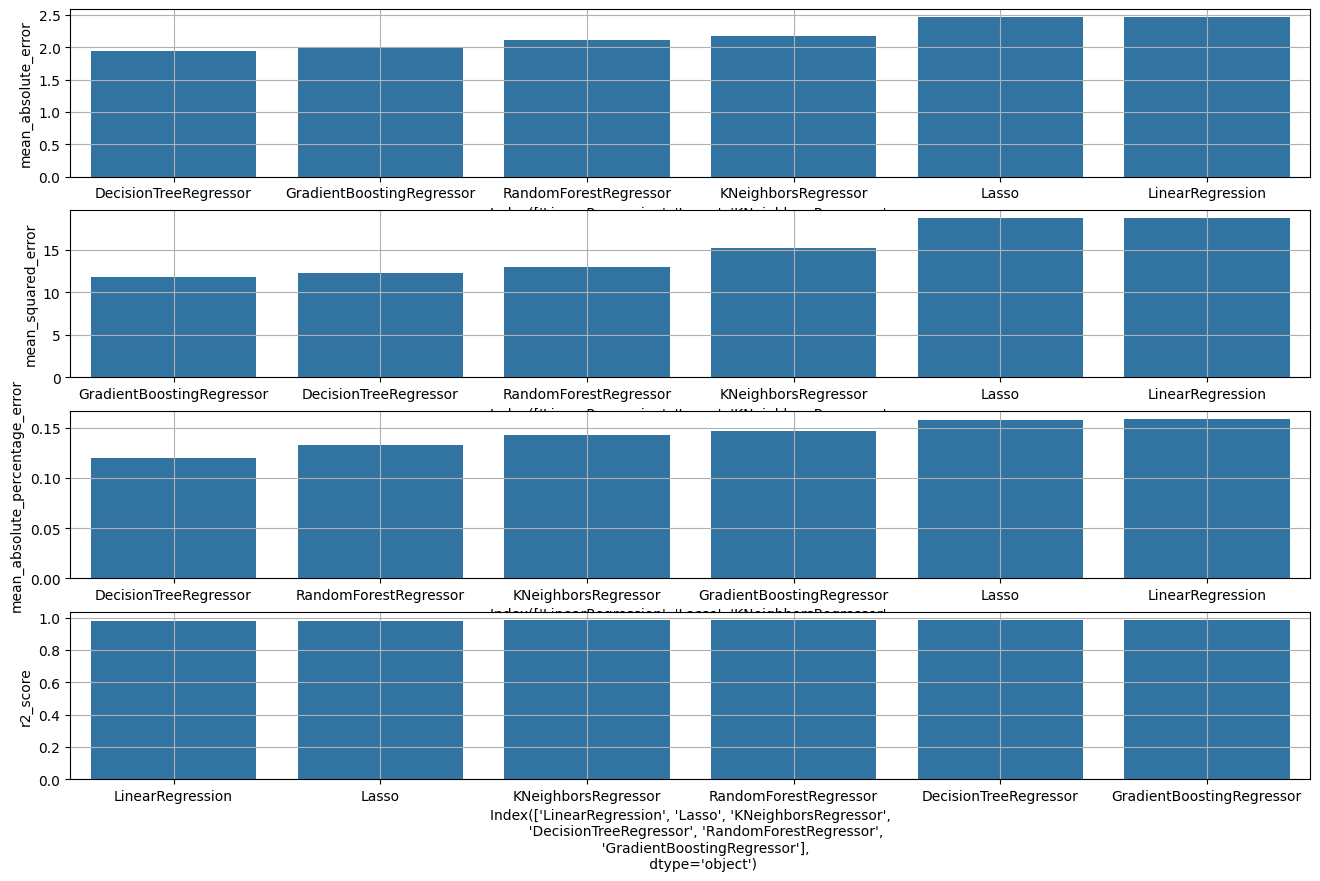

In [28]:
fig, axes = plt.subplots(df_metric.shape[1], figsize = (16, 10))

for ax, column in zip(axes.flatten(), list(df_metric.columns)):

    sns.barplot(df_metric[column].sort_values(), ax=ax)
    ax.set_xlabel(df_metric.index)
    ax.set_ylabel(column)
    ax.grid(True)

In [29]:
df_metric

,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
LinearRegression,2.466609,18.770420,0.159133,0.980201
Lasso,2.461997,18.759189,0.157619,0.980213
KNeighborsRegressor,2.174549,15.247844,0.142985,0.983916
DecisionTreeRegressor,1.942294,12.344406,0.120065,0.986979
RandomForestRegressor,2.119239,13.052926,0.132648,0.986232
GradientBoostingRegressor,2.007825,11.807350,0.146921,0.987546


Градиентный бустинг показал наилучшие результаты по всем параметрам

In [30]:
df_metric.to_csv('model_metrics.csv')   #сохраняем результаты бенчмарка в csv

In [31]:
import joblib
import os

#Сохраняем лучшие модели в папке

model_path = './models'

os.makedirs(model_path, exist_ok=True)

for model in best_models:
    name = model.named_steps["regression"]
    name = type(name).__name__
    joblib.dump(model, f'{model_path}/{name}.joblib')